# Pymaceuticals Inc.
---

### Analysis

- This data set provided results of a study of tumor reduction by different drug regimens on several mice samples.
- An approx. 50% to 50% percentage of male:female mice enables one identify that sex isn't a factor that determines how well a drug works on a certain gender of mice over the other.
- With a corellation coefficient of 0.84, we identify a high correlation between mouse weights and average tumor volume.
- Signs indicate that Capomulin is the relatively most effective drug regimen to use.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
print(merged_data)

# Display the data table for preview


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [49]:
# Checking the number of mice.
mice_count = merged_data['Mouse ID'].nunique()
print("Number of unique mice IDs:", mice_count)

Number of unique mice IDs: 249


In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
#if not duplicates.empty:
print("Mouse ID(s) with duplicate time points:")
print(duplicates)


Mouse ID(s) with duplicate time points:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicates) == False]
print(cleaned_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [78]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_data['Mouse ID'].nunique()
print(f"Updated mice count: {updated_mice_count}")

Updated mice count: 248


## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [80]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

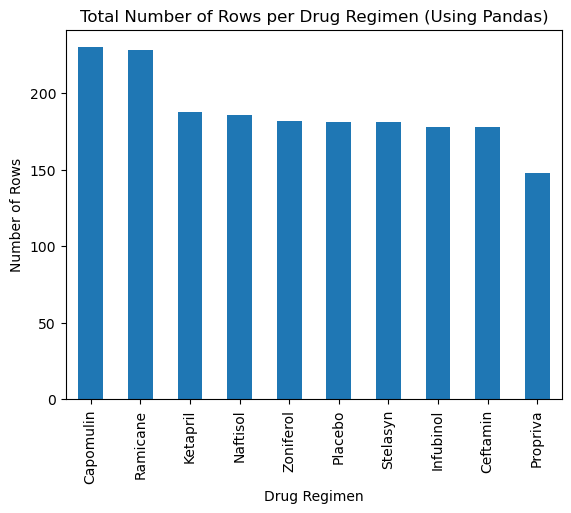

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = cleaned_data['Drug Regimen'].value_counts()
bar_data.plot(kind='bar', title='Total Number of Rows per Drug Regimen (Using Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

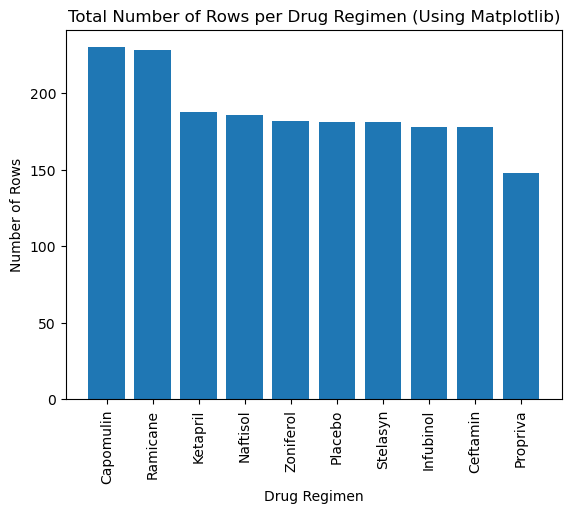

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_data.index, bar_data.values)
plt.title('Total Number of Rows per Drug Regimen (Using Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()


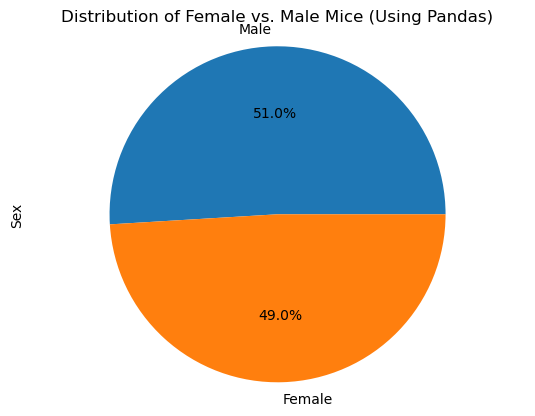

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = cleaned_data['Sex'].value_counts()
pie_data.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs. Male Mice (Using Pandas)')
plt.axis('equal')
plt.show()


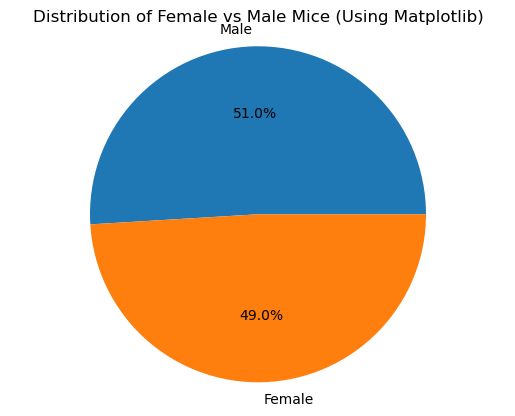

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice (Using Matplotlib)')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoints = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_merged_data = pd.merge(max_timepoints, cleaned_data, on='Mouse ID', how='inner')
print(updated_merged_data)

     Mouse ID  Timepoint_x Drug Regimen_x   Sex_x  Age_months_x  Weight (g)_x  \
0        a203           45      Infubinol  Female            20            23   
1        a203           45      Infubinol  Female            20            23   
2        a203           45      Infubinol  Female            20            23   
3        a203           45      Infubinol  Female            20            23   
4        a203           45      Infubinol  Female            20            23   
...       ...          ...            ...     ...           ...           ...   
1875     z969           45       Naftisol    Male             9            30   
1876     z969           45       Naftisol    Male             9            30   
1877     z969           45       Naftisol    Male             9            30   
1878     z969           45       Naftisol    Male             9            30   
1879     z969           45       Naftisol    Male             9            30   

      Tumor Volume (mm3)_x 

In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    tumor_volume_data.append(max_timepoints[max_timepoints['Drug Regimen']== drug]['Tumor Volume (mm3)'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for i, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.50, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    print(f"Outliers for {drug}:")
    print(outliers)

Outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


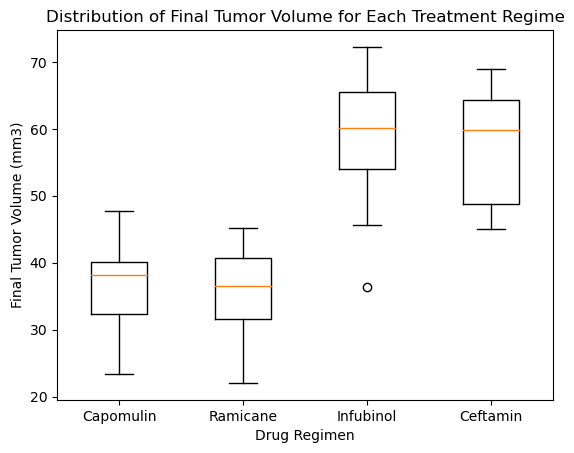

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatment_list, showfliers=True)
plt.title('Distribution of Final Tumor Volume for Each Treatment Regime')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

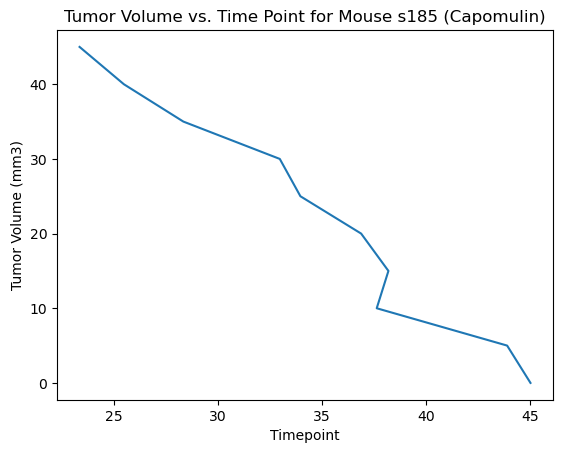

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]

capomulin_mouse_data = cleaned_data[cleaned_data['Mouse ID'] == capomulin_mouse]
plt.plot(capomulin_mouse_data['Tumor Volume (mm3)'], capomulin_mouse_data['Timepoint'])
plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

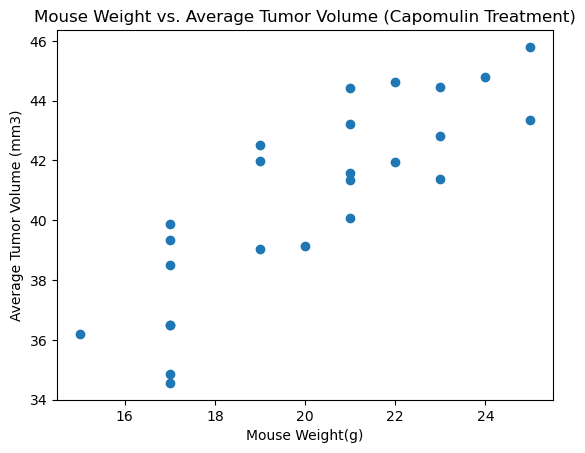

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weights, average_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume: 0.8419363424694721


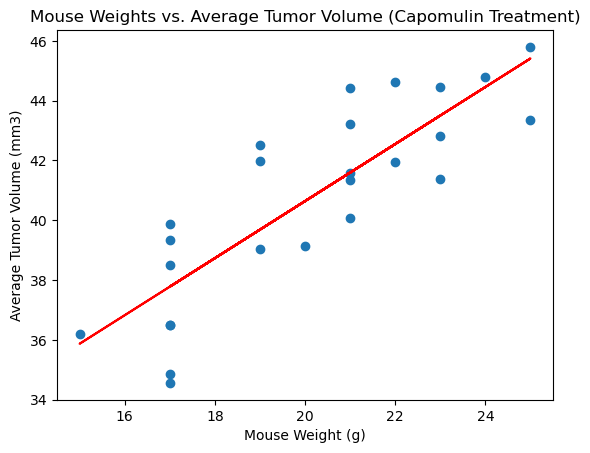

In [91]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = average_tumor_volume.corr(mouse_weights)
print(f"The correlation coefficient between mouse weight and average tumor volume: {correlation_coefficient}")

# Calculate the linear regression model between mouse weights and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
regression_values = slope * mouse_weights + intercept

# Plot the linear regression model
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, regression_values, color='red')
plt.title('Mouse Weights vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


